# ➥ Polynomial Regression

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score

In [2]:
X = 5 * np.random.rand(100,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.rand(100,1)

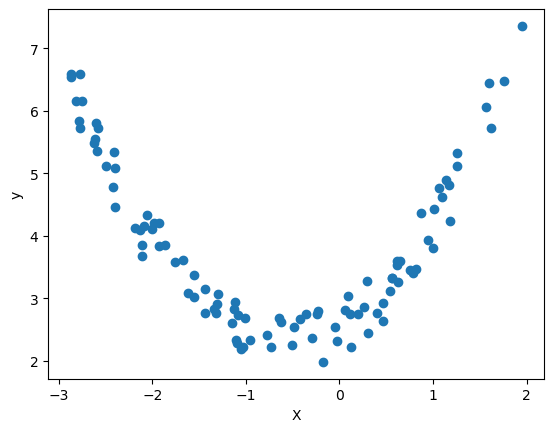

In [3]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
# First evalute with Linear Regression and see the result
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [6]:
y_pred = lr.predict(X_test)

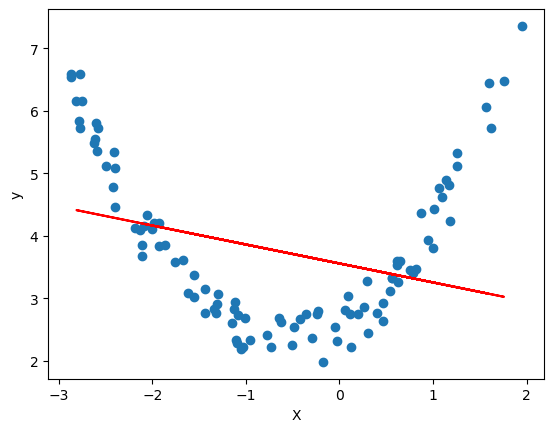

In [7]:
plt.scatter(X,y)
plt.plot(X_test,y_pred,color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [8]:
# Now evalute with polynomial technique

In [9]:
pr = PolynomialFeatures(degree=2)

In [10]:
X_train_tf = pr.fit_transform(X_train)
X_test_tf = pr.transform(X_test)

In [11]:
lr1 = LinearRegression()
lr1.fit(X_train_tf,y_train)

LinearRegression()

In [12]:
# x and x^2 value
lr1.coef_

array([[0.        , 0.84197159, 0.75888482]])

In [13]:
# b value
lr1.intercept_

array([2.61426212])

In [14]:
y_pred = lr1.predict(X_test_tf)

In [15]:
r2_score(y_test,y_pred)

0.9636599479372375

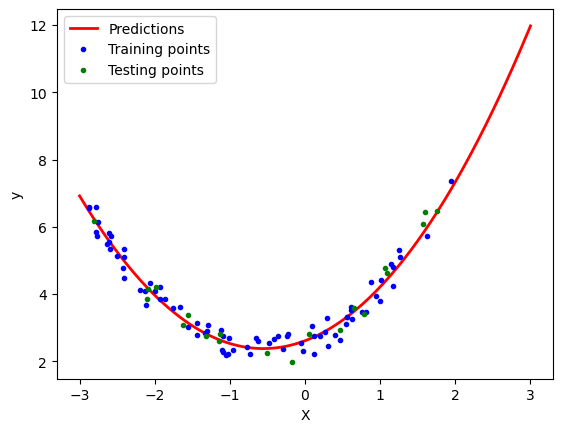

In [16]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = pr.transform(X_new)
y_new = lr1.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()